In [84]:
%%timeit
with open('C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-001.JPEG', 'rb') as f:
     data = f.read()

82.1 µs ± 273 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [83]:
%%timeit
with open(r'E:\Python Scripts\chronophoto\photo_test_temps\1900-001.JPEG', 'rb') as f:
     data = f.read()

71.3 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


1-TELECHARGER l'image en local

In [15]:
import requests
import os
import time
import re
import json
from PIL import Image

temps_debut = time.time()

def telecharger_image(url, chemin_fichier):
    try:
        if not os.path.exists(chemin_fichier):
            response = requests.get(url)
            response.raise_for_status()

            with open(chemin_fichier, 'wb') as fichier:
                fichier.write(response.content)
            print("Fichier téléchargé :", chemin_fichier)
        else:
            print("Le fichier", chemin_fichier, "existe déjà. Le téléchargement est ignoré.")

    except Exception as e:
        print("Une erreur s'est produite lors du téléchargement :", e)

text = r"C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\url_chronophoto.txt"
with open(text, 'r') as fichier:
    text = fichier.read()
    
matches = re.findall(r'\[.*?\]', text)

L=[]
for i in range(len(matches)):
    urls_annee=matches[i].split(',')
    formatted_string = ','.join(urls_annee)
    nl = json.loads(formatted_string)
    L.append(nl)


n=1899
numero_url=0
for annee in L:
    n=n+1
    numero_url=0
    for url in annee:
        numero_url=numero_url+1
        string_url = "http://" + str(url)
        chemin_fichier = r"C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\"+str(n)+"-"+str(numero_url).zfill(3)+".JPEG"
        telecharger_image(string_url, chemin_fichier)


# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Séparation du nom de fichier en année et numéro
        nom, ext = os.path.splitext(fichier)
        annee, numero = nom.split("-")
        
        # Ajout des zéros pour le numéro du fichier
        numero = "{:03d}".format(int(numero))
        
        # Nouveau nom de fichier
        nouveau_nom = f"{annee}-{numero}{ext}"
        
        # Chemin complet du fichier
        ancien_chemin = os.path.join(dossier_images, fichier)
        nouveau_chemin = os.path.join(dossier_images, nouveau_nom)
        
        # Ouverture de l'image
        image = Image.open(ancien_chemin)
        
        # Fermeture de l'image
        image.close()
        
        # Renommage du fichier
        os.rename(ancien_chemin, nouveau_chemin)

print("Rénommage des fichiers terminé.")

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")


Fichier téléchargé : C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-001.JPEG
Le fichier C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-002.JPEG existe déjà. Le téléchargement est ignoré.
Le fichier C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-003.JPEG existe déjà. Le téléchargement est ignoré.
Le fichier C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-004.JPEG existe déjà. Le téléchargement est ignoré.
Le fichier C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-005.JPEG existe déjà. Le téléchargement est ignoré.
Le fichier C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-006.JPEG existe déjà. Le téléchargement est ignoré.
Le fichier C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\1900-007.JPEG existe déjà. Le téléchargement est ignoré.
Le fichier C:\\Users\\chr

C:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (94247712 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (176947200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Rénommage des fichiers terminé.
Le programme a mis 906.3219833374023 secondes à s'exécuter.


In [10]:
inutile
"""import requests
import os
import time
import re
import json
import matplotlib.pyplot as plt
temps_debut = time.time()

def telecharger_image(url, chemin_fichier):
    try:
        response = requests.get(url)
#        print(response)
        response.raise_for_status()
#        print(response.raise_for_status())

        with open(chemin_fichier, 'wb') as fichier:
            fichier.write(response.content)

#        print("Téléchargement terminé !")
    except Exception as e:
        print("Une erreur s'est produite lors du téléchargement :", e)


text = r"C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\url_chronophoto.txt"
with open(text, 'r') as fichier:
    text = fichier.read()
    
matches = re.findall(r'\[.*?\]', text)

L=[]
for i in range(len(matches)):
    urls_annee=matches[i].split(',')
    formatted_string = ','.join(urls_annee)
    nl = json.loads(formatted_string)
    L.append(nl)

    

n=1899
numero_url=0
for annee in L:
    n=n+1
    numero_url=0
    for url in annee:
        numero_url=numero_url+1
        string_url = "http://" + str(url)
        chemin_fichier = r"C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos\\"+str(n)+"-"+str(numero_url)+".JPEG"
        telecharger_image(string_url, chemin_fichier)
        print(str(n)+'-'+str(numero_url))


temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

1899-1
1899-2
1899-3
1899-4
1899-5
1899-6
1899-7
1899-8
1899-9
1899-10
1899-11
1899-12


KeyboardInterrupt: 

J'ai supprimé le fichier "1956/18 situé à ce niveau là car endommagé. "www.chronophoto.app/katylies/1956/18.JPEG","www.chronophoto.app/katylies/1956/19.JPEG"

ainsi que le fichier "www.chronophoto.app/katylies/1973/robots.txt" car problème

2-Suppresion doublons

In [16]:
import os
import hashlib
from PIL import Image

# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Dictionnaire pour stocker les hachages des images
hachages_images = {}

# Liste pour stocker les fichiers doublons
fichiers_doublons = []

# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Chemin complet du fichier
        chemin_fichier = os.path.join(dossier_images, fichier)
        
        # Ouverture de l'image
        image = Image.open(chemin_fichier)
        
        # Calcul du hachage MD5 de l'image
        with open(chemin_fichier, 'rb') as f:
            hachage = hashlib.md5(f.read()).hexdigest()
        
        # Vérification si le hachage existe déjà
        if hachage in hachages_images:
            print("Doublon d'image trouvé :", fichier)
            print("Image déjà présente :", hachages_images[hachage])
            print("---")
            fichiers_doublons.append(chemin_fichier)
        else:
            hachages_images[hachage] = fichier

print("Vérification des doublons d'images terminée.")

# Suppression des fichiers doublons
for fichier_doublon in fichiers_doublons:
    os.remove(fichier_doublon)
    print("Fichier supprimé :", fichier_doublon)

print("Suppression des fichiers doublons terminée.")


Doublon d'image trouvé : 1900-025.JPEG
Image déjà présente : 1900-024.JPEG
---
Doublon d'image trouvé : 1901-041.JPEG
Image déjà présente : 1901-001.JPEG
---
Doublon d'image trouvé : 1904-007.JPEG
Image déjà présente : 1904-006.JPEG
---
Doublon d'image trouvé : 1904-009.JPEG
Image déjà présente : 1904-008.JPEG
---
Doublon d'image trouvé : 1904-037.JPEG
Image déjà présente : 1904-036.JPEG
---
Doublon d'image trouvé : 1919-039.JPEG
Image déjà présente : 1919-038.JPEG
---
Doublon d'image trouvé : 1923-048.JPEG
Image déjà présente : 1923-047.JPEG
---
Doublon d'image trouvé : 1932-012.JPEG
Image déjà présente : 1932-001.JPEG
---
Doublon d'image trouvé : 1933-047.JPEG
Image déjà présente : 1933-046.JPEG
---
Doublon d'image trouvé : 1935-018.JPEG
Image déjà présente : 1935-017.JPEG
---
Doublon d'image trouvé : 1947-043.JPEG
Image déjà présente : 1947-042.JPEG
---
Doublon d'image trouvé : 1948-031.JPEG
Image déjà présente : 1948-030.JPEG
---
Doublon d'image trouvé : 1948-049.JPEG
Image déjà pr

42 fichiers doublons supprimés

3-Suppression images volumineuses

In [1]:
import os
from PIL import Image
# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Taille limite en pixels
taille_limite = 89478485

# Liste pour stocker les fichiers volumineux
fichiers_volumineux = []

# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Chemin complet du fichier
        chemin_fichier = os.path.join(dossier_images, fichier)

        try:
            # Ouverture de l'image
            image = Image.open(chemin_fichier)

            # Récupération de la taille de l'image
            largeur, hauteur = image.size

            # Vérification de la taille de l'image
            if largeur * hauteur > taille_limite:
                print("Fichier volumineux trouvé :", fichier)
                fichiers_volumineux.append(chemin_fichier)
        
        except Exception as e:
            print("Erreur lors du traitement du fichier :", fichier)
            print("Message d'erreur :", str(e))

print("Vérification des fichiers volumineux terminée.")

# Suppression des fichiers volumineux
for fichier_volumineux in fichiers_volumineux:
    os.remove(fichier_volumineux)
    print("Fichier supprimé :", fichier_volumineux)

print("Suppression des fichiers volumineux terminée.")


Vérification des fichiers volumineux terminée.
Suppression des fichiers volumineux terminée.


In [18]:
#renommer inutile car deja fait dans le 1er progm
"""import os
from PIL import Image
temps_debut = time.time()
# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Séparation du nom de fichier en année et numéro
        nom, ext = os.path.splitext(fichier)
        annee, numero = nom.split("-")
        
        # Ajout des zéros pour le numéro du fichier
        numero = "{:03d}".format(int(numero))
        
        # Nouveau nom de fichier
        nouveau_nom = f"{annee}-{numero}{ext}"
        
        # Chemin complet du fichier
        ancien_chemin = os.path.join(dossier_images, fichier)
        nouveau_chemin = os.path.join(dossier_images, nouveau_nom)
        
        # Ouverture de l'image
        image = Image.open(ancien_chemin)
        
        # Fermeture de l'image
        image.close()
        
        # Renommage du fichier
        os.rename(ancien_chemin, nouveau_chemin)
#        print("Fichier renommé :", nouveau_nom)

print("Rénommage des fichiers terminé.")

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")


Rénommage des fichiers terminé.
Le programme a mis 8.350878238677979 secondes à s'exécuter.


NOMBRE DE FICHIER / AN

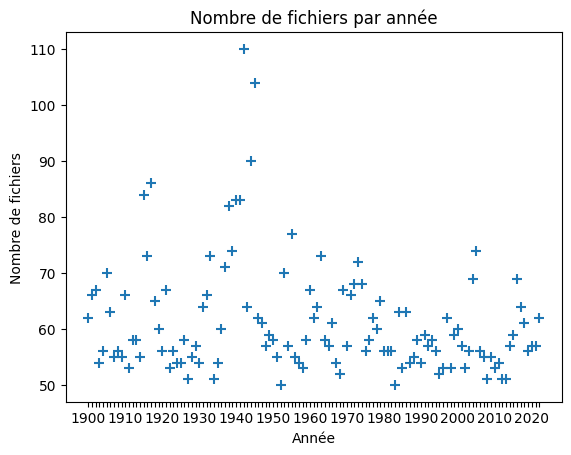

In [2]:
import os
import matplotlib.pyplot as plt

# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Dictionnaire pour stocker le nombre de fichiers par année
nb_fichiers_par_annee = {}

# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Extraction de l'année à partir du nom de fichier
        annee = fichier.split("-")[0]
        
        # Mise à jour du nombre de fichiers pour cette année
        nb_fichiers_par_annee[annee] = nb_fichiers_par_annee.get(annee, 0) + 1

# Tri des années par ordre croissant
annees = sorted(nb_fichiers_par_annee.keys(), key=int)

# Nombre de fichiers par année
nb_fichiers = [nb_fichiers_par_annee[annee] for annee in annees]

# Création du nuage de points avec des ronds
plt.scatter(annees, nb_fichiers, marker='+', s=50)
plt.xlabel('Année')
plt.ylabel('Nombre de fichiers')
plt.title('Nombre de fichiers par année')

# Récupération des positions des graduations et des étiquettes
positions = plt.xticks()[0]
etiquettes = [annees[i] if i % 10 == 0 else '' for i in range(len(annees))]

# Réglage des positions et étiquettes des graduations sur l'axe des abscisses
plt.xticks(positions, etiquettes)

plt.show()

In [17]:
import os

# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Liste pour stocker les noms de fichiers
img_id = []

# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Séparation du nom de fichier en année et numéro
        nom, ext = os.path.splitext(fichier)
        annee, numero = nom.split("-")
        
        # Ajout du nom de fichier à la liste sans guillemets
        img_id.append(f"{annee}-{numero}")

# Affichage des noms de fichiers
for nom_fichier in img_id:
    print(nom_fichier)


1900-001
1900-002
1900-003
1900-004
1900-005
1900-006
1900-007
1900-008
1900-009
1900-010
1900-011
1900-012
1900-013
1900-014
1900-015
1900-016
1900-017
1900-018
1900-019
1900-020
1900-021
1900-022
1900-023
1900-024
1900-026
1900-027
1900-028
1900-029
1900-030
1900-031
1900-032
1900-033
1900-034
1900-035
1900-036
1900-037
1900-038
1900-039
1900-040
1900-041
1900-042
1900-043
1900-044
1900-045
1900-046
1900-047
1900-048
1900-049
1900-050
1900-051
1900-052
1900-053
1900-054
1900-055
1900-056
1900-057
1900-058
1900-059
1900-060
1900-061
1900-062
1900-063
1901-001
1901-002
1901-003
1901-004
1901-005
1901-006
1901-007
1901-008
1901-009
1901-010
1901-011
1901-012
1901-013
1901-014
1901-015
1901-016
1901-017
1901-018
1901-019
1901-020
1901-021
1901-022
1901-023
1901-024
1901-025
1901-026
1901-027
1901-028
1901-029
1901-030
1901-031
1901-032
1901-033
1901-034
1901-035
1901-036
1901-037
1901-038
1901-039
1901-040
1901-042
1901-043
1901-044
1901-045
1901-046
1901-047
1901-048
1901-049
1901-050
1

In [3]:
import os

# Dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Liste pour stocker les noms de fichiers
img_id = []
img_id_2 = []
# Parcours des fichiers dans le dossier d'images
for fichier in os.listdir(dossier_images):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Séparation du nom de fichier en année et numéro
        nom, ext = os.path.splitext(fichier)
        annee, numero = nom.split("-")
        
        # Conversion du numéro de fichier en entier et ajout du nom de fichier à la liste
        img_id.append(f"{annee}-{int(numero):03d}")

# Affichage des noms de fichiers
for nom_fichier in img_id:
    print(nom_fichier)


1900-001
1900-002
1900-003
1900-004
1900-005
1900-006
1900-007
1900-008
1900-009
1900-010
1900-011
1900-012
1900-013
1900-014
1900-015
1900-016
1900-017
1900-018
1900-019
1900-020
1900-021
1900-022
1900-023
1900-024
1900-026
1900-027
1900-028
1900-029
1900-030
1900-031
1900-032
1900-033
1900-034
1900-035
1900-036
1900-037
1900-038
1900-039
1900-040
1900-041
1900-042
1900-043
1900-044
1900-045
1900-046
1900-047
1900-048
1900-049
1900-050
1900-051
1900-052
1900-053
1900-054
1900-055
1900-056
1900-057
1900-058
1900-059
1900-060
1900-061
1900-062
1900-063
1901-001
1901-002
1901-003
1901-004
1901-005
1901-006
1901-007
1901-008
1901-009
1901-010
1901-011
1901-012
1901-013
1901-014
1901-015
1901-016
1901-017
1901-018
1901-019
1901-020
1901-021
1901-022
1901-023
1901-024
1901-025
1901-026
1901-027
1901-028
1901-029
1901-030
1901-031
1901-032
1901-033
1901-034
1901-035
1901-036
1901-037
1901-038
1901-039
1901-040
1901-042
1901-043
1901-044
1901-045
1901-046
1901-047
1901-048
1901-049
1901-050
1

In [3]:
git config --global user.email "chris.kourajian@hotmail.fr"

SyntaxError: invalid syntax (3001984642.py, line 1)

In [4]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip list | grep matplotlib


Note: you may need to restart the kernel to use updated packages.


'grep' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [3]:
print(nb_fichiers)
print(len(nb_fichiers))

[62, 66, 67, 54, 56, 70, 63, 55, 56, 55, 66, 53, 58, 58, 55, 84, 73, 86, 65, 60, 56, 67, 53, 56, 54, 54, 58, 51, 55, 57, 54, 64, 66, 73, 51, 54, 60, 71, 82, 74, 83, 83, 110, 64, 90, 104, 62, 61, 57, 59, 58, 55, 50, 70, 57, 77, 55, 54, 53, 58, 67, 62, 64, 73, 58, 57, 61, 54, 52, 67, 57, 66, 68, 72, 68, 56, 58, 62, 60, 65, 56, 56, 56, 50, 63, 53, 63, 54, 55, 58, 54, 59, 57, 58, 56, 52, 53, 62, 53, 59, 60, 57, 53, 56, 69, 74, 56, 55, 51, 55, 53, 54, 51, 51, 57, 59, 69, 64, 61, 56, 57, 57, 62]
123


In [1]:
import os
import shutil

# Chemin du dossier contenant les photos originales
dossier_photos_originales = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Nom du dossier pour les nouvelles photos
nouveau_dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_2_images'

# Création du nouveau dossier
os.makedirs(nouveau_dossier_photos, exist_ok=True)

# Parcours des années
for annee in range(1900, 2023):
    # Liste des 10 premiers fichiers de l'année
    fichiers_annee = []
    
    # Parcours des fichiers dans le dossier d'origine
    for fichier in os.listdir(dossier_photos_originales):
        # Vérification du nom du fichier
        if fichier.startswith(str(annee) + '-'):
            # Ajout du fichier à la liste
            fichiers_annee.append(fichier)
            
            # Arrêt de la boucle lorsque 2 fichiers ont été trouvés
            if len(fichiers_annee) == 2:
                break
    
    # Copie des fichiers dans le nouveau dossier
    for fichier in fichiers_annee:
        chemin_fichier_original = os.path.join(dossier_photos_originales, fichier)
        chemin_fichier_nouveau = os.path.join(nouveau_dossier_photos, fichier)
        shutil.copy(chemin_fichier_original, chemin_fichier_nouveau)

print("La sélection des photos a été effectuée avec succès.")


La sélection des photos a été effectuée avec succès.


la RESOLUTION d'une image

Le programme a mis 18.814472436904907 secondes à s'exécuter.


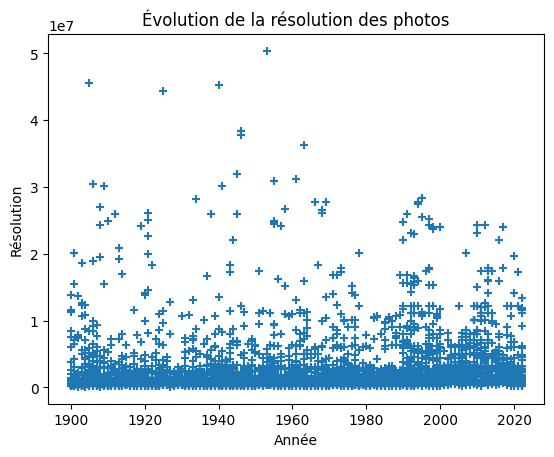

7543


In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import time
temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Création des listes pour stocker les résolutions et les années
resolutions = []
annees = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Ouverture de l'image avec PIL
        image = Image.open(chemin_fichier)
        # Récupération de la résolution de l'image
        resolution = image.size
        # Fermeture de l'image
        image.close()
        # Ajout de la résolution et de l'année aux listes correspondantes
        resolutions.append(resolution[0] * resolution[1])
        annees.append(annee)
    else:
        print('pas la bonne extension')

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du nuage de points
plt.scatter(annees, resolutions, marker='+')
plt.xlabel('Année')
plt.ylabel('Résolution')
plt.title('Évolution de la résolution des photos')

# Affichage du nuage de points
plt.show()
print(len(resolutions))


In [7]:
annees

[1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,

In [12]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [12]:
len(resolutions)

7543

In [13]:
import pandas as pd
data = {'img_id': img_id, 'année': annees, 'Resolution': resolutions, 'Nettete': nettete, 'Bruit': bruit ,'Mean_H': mean_H ,'mean_S': mean_S ,'mean_V': mean_V }
df = pd.DataFrame(data)
df.to_csv('data_regroupees.csv', index=False)



In [2]:
import pickle
with open('donnees_nettete.pkl', 'rb') as fichier:
    nettete = pickle.load(fichier)
with open('donnees_bruit_HF.pkl', 'rb') as fichier:
    bruit = pickle.load(fichier)
with open('donnees_resolutions.pkl', 'rb') as fichier:
    resolution = pickle.load(fichier)
with open('donnees_mean_H.pkl', 'rb') as fichier:
    mean_H = pickle.load(fichier)
with open('donnees_mean_S.pkl', 'rb') as fichier:
    mean_S = pickle.load(fichier)
with open('donnees_mean_V.pkl', 'rb') as fichier:
    mean_V = pickle.load(fichier)

In [22]:
git config --global user.email "email@example.com"

[71.52143550384119,
 66.71604098308967,
 126.54901487693853,
 79.25577354827688,
 76.39159066267584,
 121.36165114115927,
 117.8426243591558,
 119.53607712906276,
 87.02352317394242,
 92.6771145159698,
 183.27051395709583,
 133.69023332273514,
 44.47551488448698,
 86.86991765510545,
 55.80512814220644,
 75.77218453305018,
 45.35306247345832,
 64.60806791875726,
 62.871892262922856,
 75.8459648848414,
 59.321525879037196,
 50.58596887851889,
 49.84004024055033,
 18.19073790048489,
 95.72559184483286,
 45.59381774831543,
 91.94503235966276,
 82.43416994652405,
 90.04655963579607,
 88.52939854958633,
 75.54689952644092,
 85.8259613407527,
 47.83965144026413,
 120.89810568421788,
 94.68191445911832,
 74.01089642959761,
 91.14195715521902,
 62.648135891626204,
 89.83024895294787,
 71.56909565528177,
 117.4314797255358,
 102.83897837764563,
 29.38111456695994,
 117.65435014227067,
 69.54604498907516,
 21.515271181206636,
 101.45086442423907,
 111.9942474943532,
 93.59434267679633,
 65.326397

In [14]:
annees

[1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,

In [51]:
resolutions.index(max(resolutions))

3450

In [52]:
max(resolutions)

50369976

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Création des listes pour stocker les résolutions et les années
resolutions = []
annees = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Ouverture de l'image avec PIL
        image = Image.open(chemin_fichier)
        # Récupération de la résolution de l'image
        resolution = image.size
        # Fermeture de l'image
        image.close()
        # Ajout de la résolution et de l'année aux listes correspondantes
        resolutions.append(resolution[0] * resolution[1])
        annees.append(annee)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de résolution pour chaque année
moyennes_resolutions = {}
for annee, resolution in zip(annees, resolutions):
    if annee in moyennes_resolutions:
        moyennes_resolutions[annee].append(resolution)
    else:
        moyennes_resolutions[annee] = [resolution]

# Calcul de la médiane de résolution pour chaque année
medianes_resolutions = {}
for annee, resolution in zip(annees, resolutions):
    if annee in medianes_resolutions:
        medianes_resolutions[annee].append(resolution)
    else:
        medianes_resolutions[annee] = [resolution]
        
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de résolution en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes in moyennes_resolutions.items():
    moyenne = np.mean(moyennes)
    plt.plot(annee, moyenne, 'bo')
plt.xlabel('Année')
plt.ylabel('Moyenne de résolution')
plt.title('Évolution de la moyenne de résolution des photos')

# Création du graphe de la médiane de résolution en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes in medianes_resolutions.items():
    mediane = np.median(medianes)
    plt.plot(annee, mediane, 'ro')
plt.xlabel('Année')
plt.ylabel('Médiane de résolution')
plt.title('Évolution de la médiane de résolution des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


NameError: name 'time' is not defined

====================================================================BRUIT image====================================================================================================

Méthode de la variance des pixels

Méthode de la transformée en ondelettes

Temps d'exécution : 1198.50 secondes


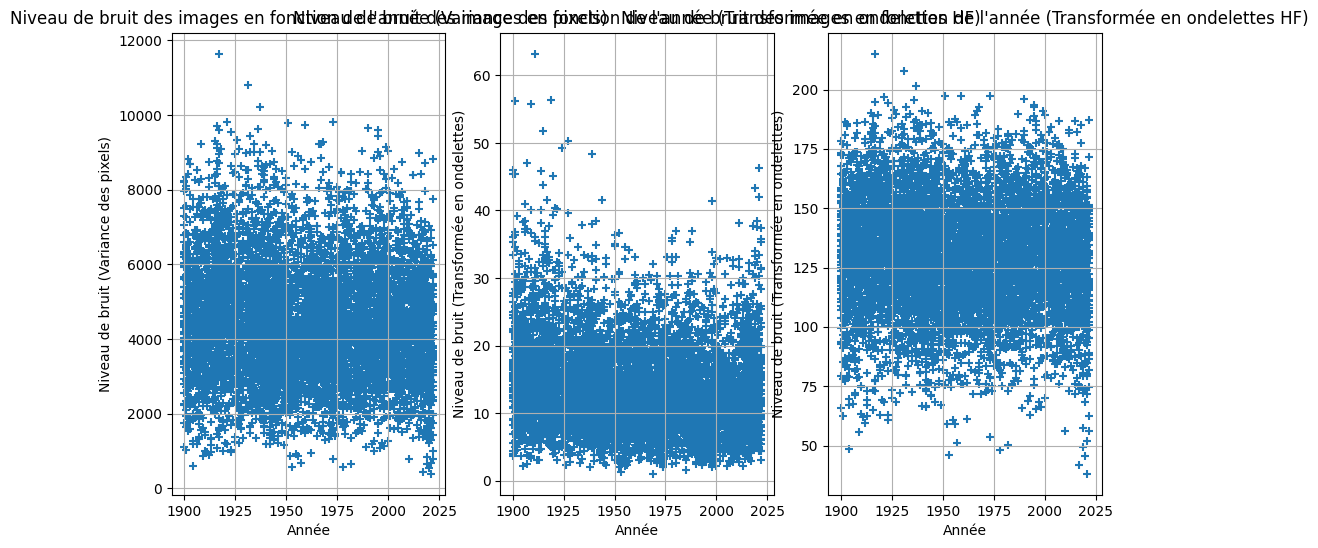

In [181]:
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pywt

# Dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Méthode 1 : Variance des pixels
def calculer_niveau_bruit_variance(image):
    # Conversion de l'image en niveaux de gris
    image_gris = image.convert('L')
    
    # Conversion de l'image en un tableau NumPy
    pixels = np.array(image_gris)
    
    # Calcul de la variance des pixels
    variance = np.var(pixels)
    
    return variance

# Méthode 2 : Transformée en ondelettes
def calculer_niveau_bruit_ondelettes_HF(image):                                       #ajout _HF
    # Conversion de l'image en niveaux de gris
    image_gris = image.convert('L')
    
    # Conversion de l'image en un tableau NumPy
    pixels = np.array(image_gris)
    
    # Calcul de la transformée en ondelettes
    coeffs = pywt.dwt2(pixels, 'haar')
    # Extraction du coefficient de détail (high frequency)
    coeffs_details = coeffs[1][0]
    # Calcul de l'écart-type du coefficient de détail
    ecart_type = np.std(coeffs_details)
    
    return ecart_type

def calculer_niveau_bruit_ondelettes_BF(image):                                       #ajout _BF
    # Conversion de l'image en niveaux de gris
    image_gris = image.convert('L')
    
    # Conversion de l'image en un tableau NumPy
    pixels = np.array(image_gris)
    
    # Calcul de la transformée en ondelettes
    coeffs = pywt.dwt2(pixels, 'haar')
    # Extraction du coefficient de détail (high frequency)
    coeffs_details = coeffs[0]
    # Calcul de l'écart-type du coefficient de détail
    ecart_type = np.std(coeffs_details)
    
    return ecart_type

# Initialisation des listes pour stocker les années et les niveaux de bruit
annees = []
niveaux_bruit_variance = []
niveaux_bruit_ondelettes_HF = []
niveaux_bruit_ondelettes_BF = []

# Mesure du temps d'exécution
start_time = time.time()

# Parcours des fichiers dans le dossier des photos
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split("-")[0])
        
        # Ouverture de l'image
        chemin_fichier = os.path.join(dossier_photos, fichier)
        image = Image.open(chemin_fichier)
        
        # Calcul du niveau de bruit avec la méthode de la variance des pixels
        niveau_bruit_variance = calculer_niveau_bruit_variance(image)
        
        # Calcul du niveau de bruit avec la méthode de la transformée en ondelettes
        niveau_bruit_ondelettes_HF = calculer_niveau_bruit_ondelettes_HF(image)                         #ajout _HF

        # Calcul du niveau de bruit avec la méthode de la transformée en ondelettes
        niveau_bruit_ondelettes_BF = calculer_niveau_bruit_ondelettes_BF(image)                         #ajout _HF
        
        # Ajout de l'année et du niveau de bruit aux listes
        annees.append(annee)
        niveaux_bruit_variance.append(niveau_bruit_variance)
        niveaux_bruit_ondelettes_HF.append(niveau_bruit_ondelettes_HF)
        niveaux_bruit_ondelettes_BF.append(niveau_bruit_ondelettes_BF)

# Temps d'exécution total
execution_time = time.time() - start_time
print("Temps d'exécution : %.2f secondes" % execution_time)

# Tracé des graphiques
plt.figure(figsize=(12, 6))

# Graphe avec la méthode de la variance des pixels
plt.subplot(1, 3, 1)
plt.scatter(annees, niveaux_bruit_variance, marker='+')
plt.xlabel('Année')
plt.ylabel('Niveau de bruit (Variance des pixels)')
plt.title('Niveau de bruit des images en fonction de l\'année (Variance des pixels)')
plt.grid(True)

# Graphe avec la méthode de la transformée en ondelettes
plt.subplot(1, 3, 2)
plt.scatter(annees, niveaux_bruit_ondelettes_HF, marker='+')
plt.xlabel('Année')
plt.ylabel('Niveau de bruit (Transformée en ondelettes)')
plt.title('Niveau de bruit des images en fonction de l\'année (Transformée en ondelettes HF)')
plt.grid(True)

# Graphe avec la méthode de la transformée en ondelettes
plt.subplot(1, 3, 3)
plt.scatter(annees, niveaux_bruit_ondelettes_BF, marker='+')
plt.xlabel('Année')
plt.ylabel('Niveau de bruit (Transformée en ondelettes)')
plt.title('Niveau de bruit des images en fonction de l\'année (Transformée en ondelettes BF)')
plt.grid(True)

plt.show()


In [183]:
import pickle
with open('donnees_bruit_ond_HF.pkl', 'wb') as fichier:
    pickle.dump(niveaux_bruit_ondelettes_HF, fichier)

In [184]:
import pickle
with open('donnees_bruit_ond_BF.pkl', 'wb') as fichier:
    pickle.dump(niveaux_bruit_ondelettes_BF, fichier)

In [186]:
import pickle
with open('donnees_bruit_var.pkl', 'wb') as fichier:
    pickle.dump(niveaux_bruit_variance, fichier)

Temps d'exécution : 736.31 secondes


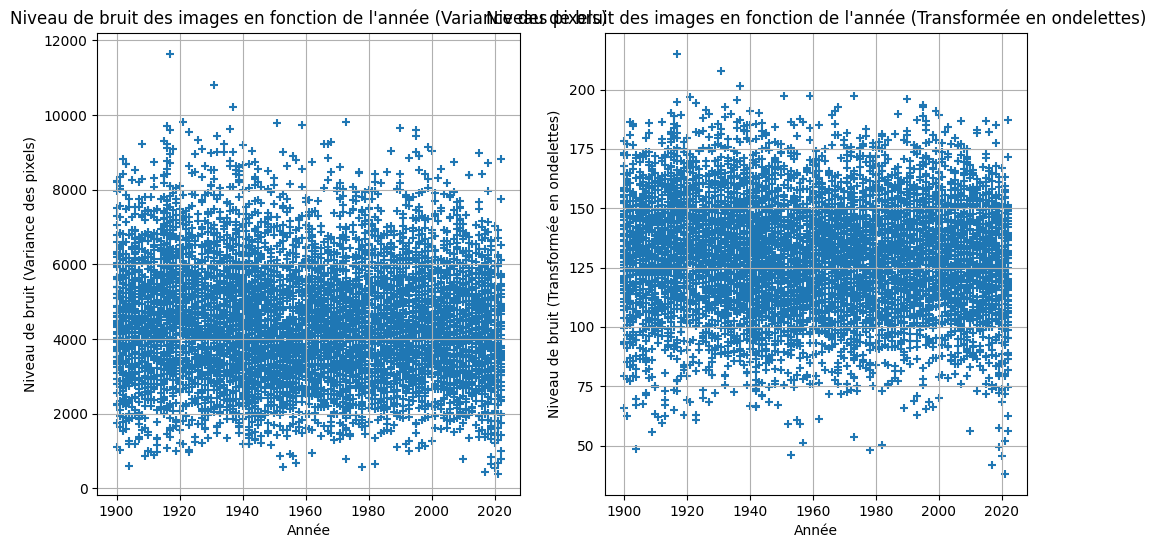

In [182]:
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pywt

# Dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Méthode 1 : Variance des pixels
def calculer_niveau_bruit_variance(image):
    # Conversion de l'image en niveaux de gris
    image_gris = image.convert('L')
    
    # Conversion de l'image en un tableau NumPy
    pixels = np.array(image_gris)
    
    # Calcul de la variance des pixels
    variance = np.var(pixels)
    
    return variance

# Méthode 2 : Transformée en ondelettes
def calculer_niveau_bruit_ondelettes_BF(image):                                       #ajout _HF
    # Conversion de l'image en niveaux de gris
    image_gris = image.convert('L')
    
    # Conversion de l'image en un tableau NumPy
    pixels = np.array(image_gris)
    
    # Calcul de la transformée en ondelettes
    coeffs = pywt.dwt2(pixels, 'haar')
    # Extraction du coefficient de détail (high frequency)
    coeffs_details = coeffs[0]
    # Calcul de l'écart-type du coefficient de détail
    ecart_type = np.std(coeffs_details)
    
    return ecart_type

# Initialisation des listes pour stocker les années et les niveaux de bruit
annees = []
niveaux_bruit_variance = []
niveaux_bruit_ondelettes = []

# Mesure du temps d'exécution
start_time = time.time()

# Parcours des fichiers dans le dossier des photos
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension .jpg ou .jpeg
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split("-")[0])
        
        # Ouverture de l'image
        chemin_fichier = os.path.join(dossier_photos, fichier)
        image = Image.open(chemin_fichier)
        
        # Calcul du niveau de bruit avec la méthode de la variance des pixels
        niveau_bruit_variance = calculer_niveau_bruit_variance(image)
        
        # Calcul du niveau de bruit avec la méthode de la transformée en ondelettes
        niveau_bruit_ondelettes = calculer_niveau_bruit_ondelettes_BF(image)                         #ajout _HF
        
        # Ajout de l'année et du niveau de bruit aux listes
        annees.append(annee)
        niveaux_bruit_variance.append(niveau_bruit_variance)
        niveaux_bruit_ondelettes.append(niveau_bruit_ondelettes)

# Temps d'exécution total
execution_time = time.time() - start_time
print("Temps d'exécution : %.2f secondes" % execution_time)

# Tracé des graphiques
plt.figure(figsize=(12, 6))

# Graphe avec la méthode de la variance des pixels
plt.subplot(1, 2, 1)
plt.scatter(annees, niveaux_bruit_variance, marker='+')
plt.xlabel('Année')
plt.ylabel('Niveau de bruit (Variance des pixels)')
plt.title('Niveau de bruit des images en fonction de l\'année (Variance des pixels)')
plt.grid(True)

# Graphe avec la méthode de la transformée en ondelettes
plt.subplot(1, 2, 2)

plt.scatter(annees, niveaux_bruit_ondelettes, marker='+')
plt.xlabel('Année')
plt.ylabel('Niveau de bruit (Transformée en ondelettes)')
plt.title('Niveau de bruit des images en fonction de l\'année (Transformée en ondelettes)')
plt.grid(True)

plt.show()


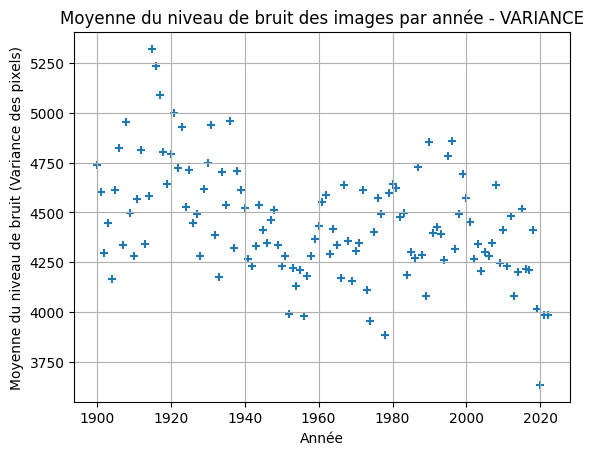

In [63]:
import os
import matplotlib.pyplot as plt

# Création du dictionnaire pour stocker les moyennes du bruit par année
moyennes_bruit_par_annee = {}

# Calcul de la moyenne du bruit par année
for annee, niveau_bruit in zip(annees, niveaux_bruit_variance):
    if annee in moyennes_bruit_par_annee:
        moyennes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        moyennes_bruit_par_annee[annee] = [niveau_bruit]

for annee in moyennes_bruit_par_annee:
    moyenne = sum(moyennes_bruit_par_annee[annee]) / len(moyennes_bruit_par_annee[annee])
    moyennes_bruit_par_annee[annee] = moyenne

# Création du graphique
plt.scatter(moyennes_bruit_par_annee.keys(), moyennes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne du niveau de bruit (Variance des pixels)')
plt.title('Moyenne du niveau de bruit des images par année - VARIANCE')
plt.grid(True)
plt.show()


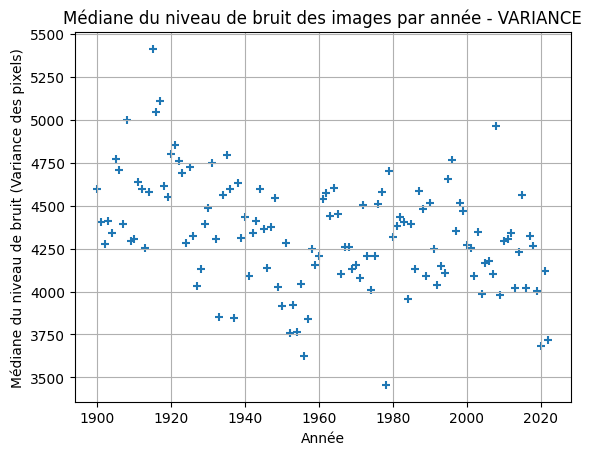

In [64]:
import os
import matplotlib.pyplot as plt
import statistics

# Création du dictionnaire pour stocker les médianes du bruit par année
medianes_bruit_par_annee = {}

# Calcul de la médiane du bruit par année
for annee, niveau_bruit in zip(annees, niveaux_bruit_variance):
    if annee in medianes_bruit_par_annee:
        medianes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        medianes_bruit_par_annee[annee] = [niveau_bruit]

for annee in medianes_bruit_par_annee:
    mediane = statistics.median(medianes_bruit_par_annee[annee])
    medianes_bruit_par_annee[annee] = mediane

# Création du graphique
plt.scatter(medianes_bruit_par_annee.keys(), medianes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane du niveau de bruit (Variance des pixels)')
plt.title('Médiane du niveau de bruit des images par année - VARIANCE')
plt.grid(True)
plt.show()


In [108]:
print(annee)

2022


In [ ]:
import os
import matplotlib.pyplot as plt
import statistics

# Création du dictionnaire pour stocker les médianes et moyennes du bruit par année
medianes_bruit_par_annee = {}

# Calcul de la médiane et du bruit par année
for annee, niveau_bruit in zip(annees, niveaux_bruit_variance):
    if annee in medianes_bruit_par_annee:
        medianes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        medianes_bruit_par_annee[annee] = [niveau_bruit]

for annee in medianes_bruit_par_annee:
    mediane = statistics.median(medianes_bruit_par_annee[annee])
    medianes_bruit_par_annee[annee] = mediane

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphe de la médiane du bruit par année
plt.subplot(1, 2, 1)
plt.scatter(medianes_bruit_par_annee.keys(), medianes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane du niveau de bruit ( des pixels)')
plt.title('Médiane du niveau de bruit des images par année - VARIANCE ')
plt.grid(True)


plt.tight_layout()
plt.show()


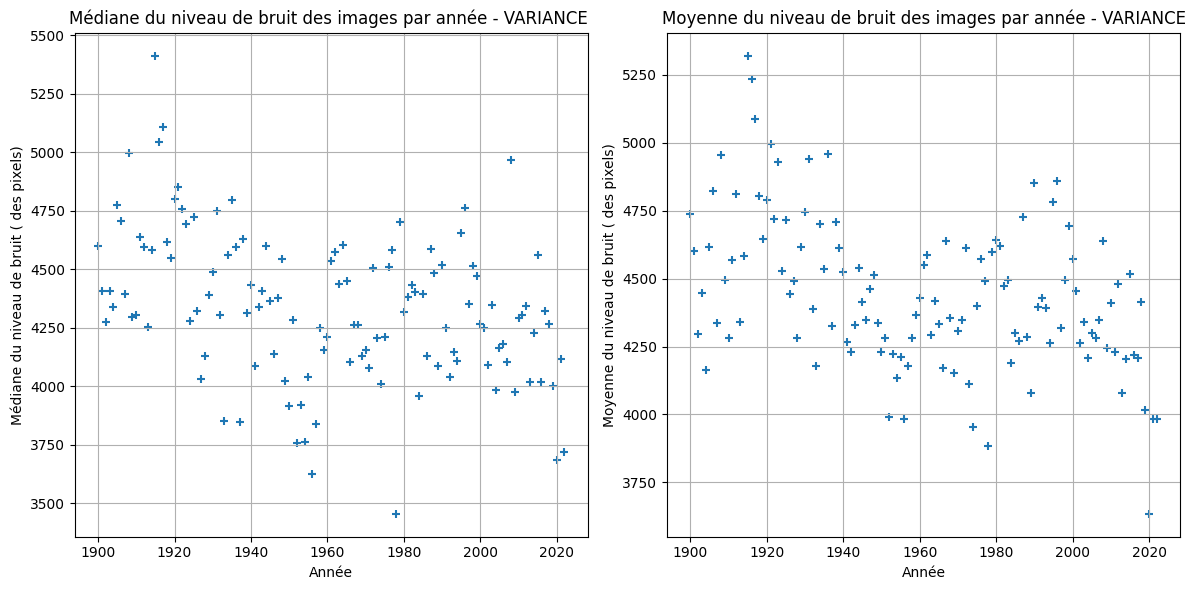

In [94]:
import os
import matplotlib.pyplot as plt
import statistics

# Création du dictionnaire pour stocker les médianes et moyennes du bruit par année
medianes_bruit_par_annee = {}
moyennes_bruit_par_annee = {}

# Calcul de la médiane et de la moyenne du bruit par année
for annee, niveau_bruit in zip(annees, niveaux_bruit_variance):
    if annee in medianes_bruit_par_annee:
        medianes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        medianes_bruit_par_annee[annee] = [niveau_bruit]
    
    if annee in moyennes_bruit_par_annee:
        moyennes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        moyennes_bruit_par_annee[annee] = [niveau_bruit]

for annee in medianes_bruit_par_annee:
    mediane = statistics.median(medianes_bruit_par_annee[annee])
    medianes_bruit_par_annee[annee] = mediane

for annee in moyennes_bruit_par_annee:
    moyenne = statistics.mean(moyennes_bruit_par_annee[annee])
    moyennes_bruit_par_annee[annee] = moyenne

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphe de la médiane du bruit par année
plt.subplot(1, 2, 1)
plt.scatter(medianes_bruit_par_annee.keys(), medianes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane du niveau de bruit ( des pixels)')
plt.title('Médiane du niveau de bruit des images par année - VARIANCE ')
plt.grid(True)

# Graphe de la moyenne du bruit par année
plt.subplot(1, 2, 2)
plt.scatter(moyennes_bruit_par_annee.keys(), moyennes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne du niveau de bruit ( des pixels)')
plt.title('Moyenne du niveau de bruit des images par année - VARIANCE')
plt.grid(True)

plt.tight_layout()
plt.show()


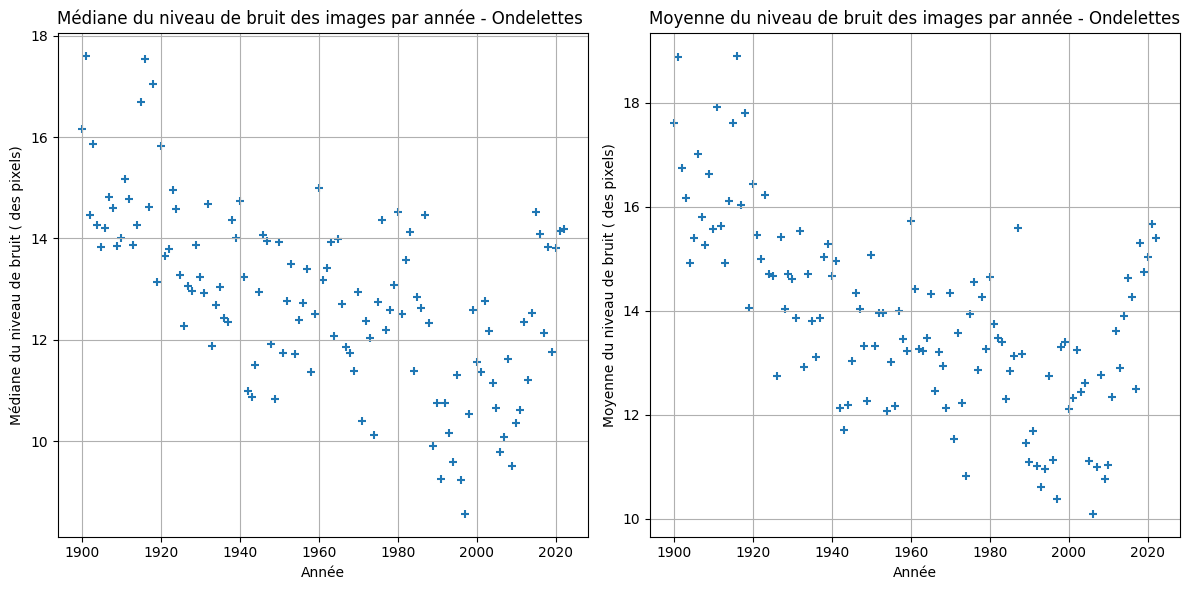

In [95]:
import os
import matplotlib.pyplot as plt
import statistics

# Création du dictionnaire pour stocker les médianes et moyennes du bruit par année
medianes_bruit_par_annee = {}
moyennes_bruit_par_annee = {}

# Calcul de la médiane et de la moyenne du bruit par année
for annee, niveau_bruit in zip(annees, niveaux_bruit_ondelettes):
    if annee in medianes_bruit_par_annee:
        medianes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        medianes_bruit_par_annee[annee] = [niveau_bruit]
    
    if annee in moyennes_bruit_par_annee:
        moyennes_bruit_par_annee[annee].append(niveau_bruit)
    else:
        moyennes_bruit_par_annee[annee] = [niveau_bruit]

for annee in medianes_bruit_par_annee:
    mediane = statistics.median(medianes_bruit_par_annee[annee])
    medianes_bruit_par_annee[annee] = mediane

for annee in moyennes_bruit_par_annee:
    moyenne = statistics.mean(moyennes_bruit_par_annee[annee])
    moyennes_bruit_par_annee[annee] = moyenne

# Création des graphiques
plt.figure(figsize=(12, 6))

# Graphe de la médiane du bruit par année
plt.subplot(1, 2, 1)
plt.scatter(medianes_bruit_par_annee.keys(), medianes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane du niveau de bruit ( des pixels)')
plt.title('Médiane du niveau de bruit des images par année - Ondelettes ')
plt.grid(True)

# Graphe de la moyenne du bruit par année
plt.subplot(1, 2, 2)
plt.scatter(moyennes_bruit_par_annee.keys(), moyennes_bruit_par_annee.values(), marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne du niveau de bruit ( des pixels)')
plt.title('Moyenne du niveau de bruit des images par année - Ondelettes')
plt.grid(True)

plt.tight_layout()
plt.show()


In [134]:
medianes_bruit_par_annee[1900]


16.16279564967577

In [151]:
LL=[]
for bruit in niveaux_bruit_ondelettes[:62]:
    LL.append(bruit)
    LL.sort()
print(LL[0])
print(LL[30])
print(LL[31])
print((LL[31]+LL[32])/2)
print(LL[32])
print(LL[33])

np.size(LL)
print('wwwwwwww')
print(niveaux_bruit_ondelettes[31])
print(niveaux_bruit_ondelettes[32])

3.6803536425825176
15.985146773301642
16.340444526049897
16.359766403681302
16.379088281312708
16.582068527920008
wwwwwwww
17.579640275352812
6.899458167654808


In [ ]:
NETTETÉ IMAGE

Le programme a mis 411.9063642024994 secondes à s'exécuter.


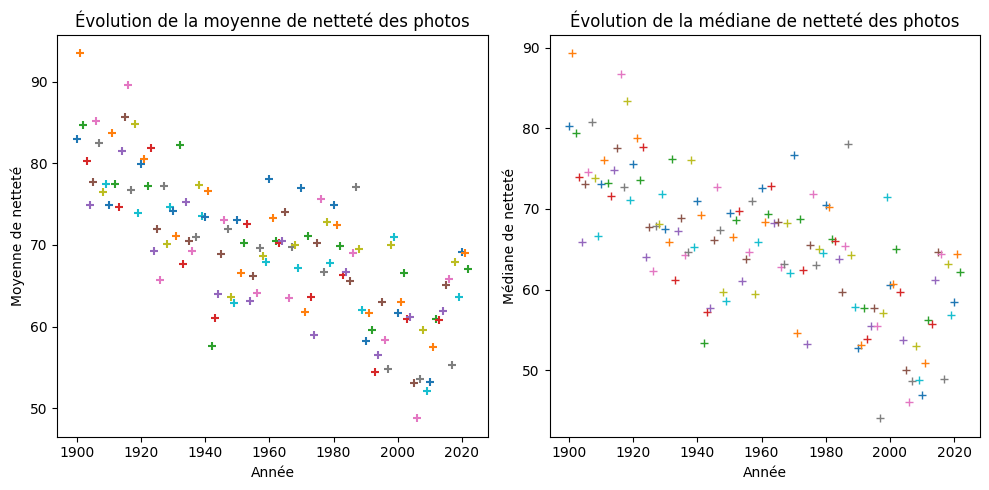

In [107]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
temps_debut = time.time()
# Chemin du dossier contenant les photos
dossier_photos = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Création des listes pour stocker les années et les mesures de netteté
annees = []
nettetes = []

# Parcours des fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    # Vérification de l'extension du fichier
    if fichier.endswith('.jpg') or fichier.endswith('.JPG') or fichier.endswith('.JPEG') or fichier.endswith('.jpeg'):
        # Extraction de l'année à partir du nom du fichier
        annee = int(fichier.split('-')[0])
        # Construction du chemin complet du fichier
        chemin_fichier = os.path.join(dossier_photos, fichier)
        # Chargement de l'image avec OpenCV
        img = cv2.imread(chemin_fichier)
        # Conversion de l'image en niveaux de gris
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Calcul de la netteté de l'image
        gradient_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
        gradient_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)
        sharpness = gradient_magnitude.mean()
        # Ajout de l'année et de la netteté aux listes correspondantes
        annees.append(annee)
        nettetes.append(sharpness)
    else:
        print('pas la bonne extension')

# Calcul de la moyenne de netteté pour chaque année
moyennes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in moyennes_nettete:
        moyennes_nettete[annee].append(nettete)
    else:
        moyennes_nettete[annee] = [nettete]

# Calcul de la médiane de netteté pour chaque année
medianes_nettete = {}
for annee, nettete in zip(annees, nettetes):
    if annee in medianes_nettete:
        medianes_nettete[annee].append(nettete)
    else:
        medianes_nettete[annee] = [nettete]
        
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Création du graphe de la moyenne de netteté en fonction de l'année
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for annee, moyennes in moyennes_nettete.items():
    moyenne = np.mean(moyennes)
    plt.scatter(annee, moyenne, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne de netteté')
plt.title('Évolution de la moyenne de netteté des photos')

# Création du graphe de la médiane de netteté en fonction de l'année
plt.subplot(1, 2, 2)
for annee, medianes in medianes_nettete.items():
    mediane = np.median(medianes)
    plt.plot(annee, mediane, marker='+')
plt.xlabel('Année')
plt.ylabel('Médiane de netteté')
plt.title('Évolution de la médiane de netteté des photos')

# Ajustement des espaces entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


In [149]:
from fonction_dossier_test import fonction_test

print(fonction_test():)

SyntaxError: invalid syntax (4013791655.py, line 3)

In [57]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [59]:
!pip install pywavelets

                                              0.0/4.2 MB ? eta -:--:--
     --------                                 0.8/4.2 MB 27.1 MB/s eta 0:00:01
     -----------------                        1.8/4.2 MB 23.0 MB/s eta 0:00:01
     --------------------------               2.8/4.2 MB 22.2 MB/s eta 0:00:01
     -----------------------------------      3.7/4.2 MB 21.7 MB/s eta 0:00:01
     ---------------------------------------  4.2/4.2 MB 22.1 MB/s eta 0:00:01
     ---------------------------------------- 4.2/4.2 MB 17.7 MB/s eta 0:00:00


verification si DOUBLON dans mes dossiers car il y a une différence de 2 images/fichiers entre mon mon dossier en local et le fichier "url_chronophoto"

In [81]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [84]:
!pip install hashlib

ERROR: Could not find a version that satisfies the requirement hashlib (from versions: 20081119)
ERROR: No matching distribution found for hashlib


C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test

In [160]:
import pickle
with open('donnees_annees.pkl', 'wb') as fichier:
    pickle.dump(annees, fichier)


In [164]:
import pickle
with open('donnees_bruit_var.pkl', 'wb') as fichier:
    pickle.dump(niveaux_bruit_variance, fichier)

In [167]:
import pickle
with open('donnees_bruit_ond.pkl', 'wb') as fichier:
    pickle.dump(niveaux_bruit_ondelettes, fichier)

In [167]:
import pickle
with open('donnees_bruit_ond.pkl', 'wb') as fichier:
    pickle.dump(niveaux_bruit_ondelettes, fichier)

In [2]:
annees

NameError: name 'annees' is not defined

In [161]:
niveaux_bruit_variance

[5407.505231900741,
 5999.129393714096,
 4587.225288809821,
 4609.435211572008,
 3352.233898242814,
 4182.095594228898,
 7978.053297606789,
 5670.896538440269,
 2802.726047088343,
 3992.7992595824867,
 5612.613479274286,
 5220.671596682775,
 2939.5046760266446,
 3741.711902191485,
 6026.154227751588,
 4372.693383027241,
 5398.45871490195,
 2568.495845045519,
 3506.9555909996284,
 2257.1628095876813,
 6276.681132258253,
 5600.512116796261,
 4853.014915022737,
 5087.268786665774,
 7290.474777769616,
 4015.3840483818576,
 4453.3881648048155,
 3518.2234981910487,
 4429.769008924205,
 5934.101119419876,
 5625.34465266115,
 4706.332798157406,
 4876.307200698012,
 3409.4898451373138,
 6202.2137921472095,
 5097.635974146412,
 6599.914019096837,
 4473.011146254901,
 3688.9592812259007,
 3103.1828240574955,
 7513.487168213363,
 3253.8076062115756,
 1095.9658691881946,
 8201.292811733563,
 4123.807190862804,
 3339.650165763441,
 4328.124519202075,
 5387.119205633358,
 3513.555778039709,
 3687.343

In [162]:
len(niveaux_bruit_variance)

7542

In [165]:
niveaux_bruit_ondelettes

[16.379088281312708,
 16.749532042322162,
 27.30175899297524,
 15.024189484178311,
 12.764052775481963,
 19.749099699818956,
 33.4711139585914,
 24.969633832480632,
 15.325489429816608,
 13.446590168928543,
 45.35861842188043,
 36.12844882029475,
 12.199900657028177,
 15.985146773301642,
 12.205132070429405,
 16.9595779551908,
 10.789475121293952,
 15.761000673031647,
 12.55415545495308,
 13.106174747189964,
 11.774373879227108,
 10.931315147156155,
 10.930397741586221,
 4.035732955168537,
 24.48496476846631,
 9.06756113790765,
 21.99349885208843,
 17.274123795458113,
 17.737697621239263,
 15.56621908425162,
 19.487285984075914,
 17.579640275352812,
 6.899458167654808,
 26.43168925660394,
 15.775021905921173,
 13.698317843957403,
 22.122164957541184,
 17.469332190412622,
 17.803622023004912,
 14.8431582987944,
 27.85061356768198,
 19.077251157886103,
 4.375672799133573,
 35.3891228073693,
 11.822275765948717,
 3.6803536425825176,
 22.2192904438633,
 22.141377586717308,
 17.248016041448

In [166]:
len(niveaux_bruit_ondelettes)

7542